# Visualizing Univariate and Bivariate Distributions in Seaborn
**Abid Ali**

Email: [abdsoftfsd@gmail.com](mailto:abdsoftfsd@gmail.com)

Skype: abd.soft


In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')


In [69]:
# dataset - kaggle.com/mustafaali96/weight-height
weight_data = pd.read_json('datasets/weight.json')
weight_data.head(10)


,Gender,Weight
0,Male,241.893563
1,Male,162.310473
2,Male,212.740856
3,Male,220.042470
4,Male,206.349801
5,Male,152.212156
6,Male,183.927889
7,Male,167.971110
8,Male,175.929440
9,Male,156.399676


In [70]:
weight_data.shape


(10000, 2)

Text(6.085000000000008, 0.5, 'Density')

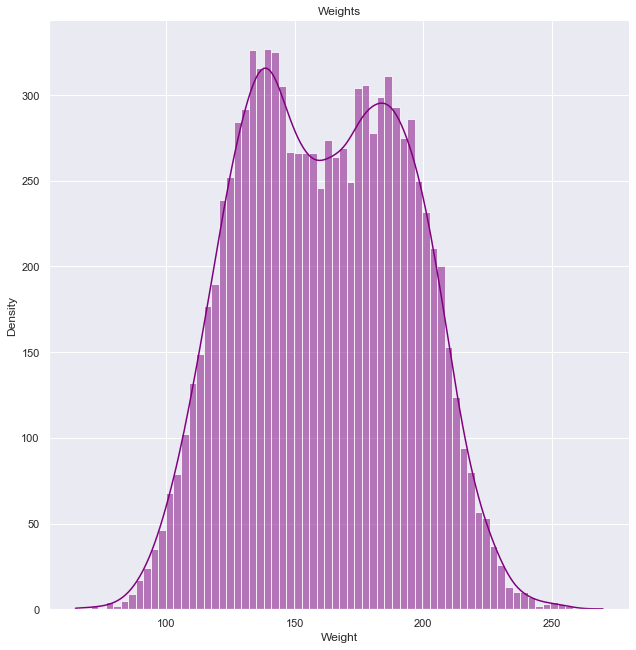

In [71]:
# plt.figure(figsize=(12, 8))
# sns.distplot(weight_data['Weight'], color='purple')

# displot is a figure level plot, its dimensions can be controlled by height and aspect.
sns.displot(
    weight_data['Weight'], color='purple', kde=True, height=9, aspect=1,
    bins=70,
)

plt.title('Weights')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

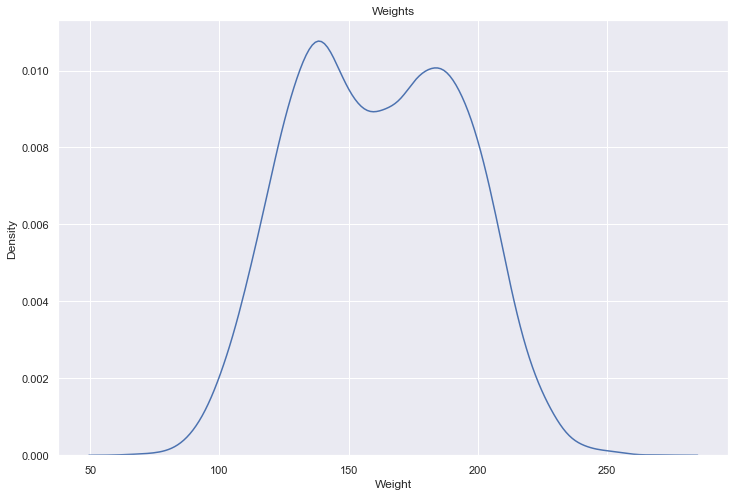

In [72]:
# Creating KDE curve
plt.figure(figsize=(12, 8))
sns.kdeplot(
    weight_data['Weight']
)

plt.title('Weights')
plt.ylabel('Density')

Text(5.960000000000001, 0.5, 'Density')

<Figure size 864x576 with 0 Axes>

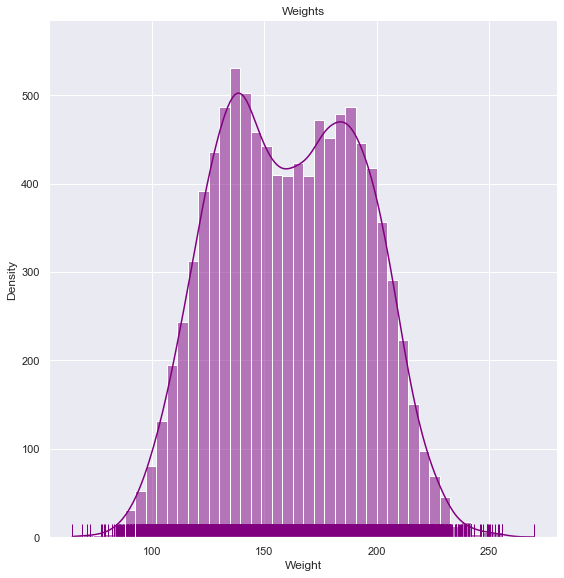

In [73]:
plt.figure(figsize=(12, 8))
sns.displot(
    weight_data['Weight'],
    height=8,
    rug=True,
    color='purple',
    kde=True
)

plt.title('Weights')
plt.ylabel('Density')


Text(0, 0.5, 'Density')

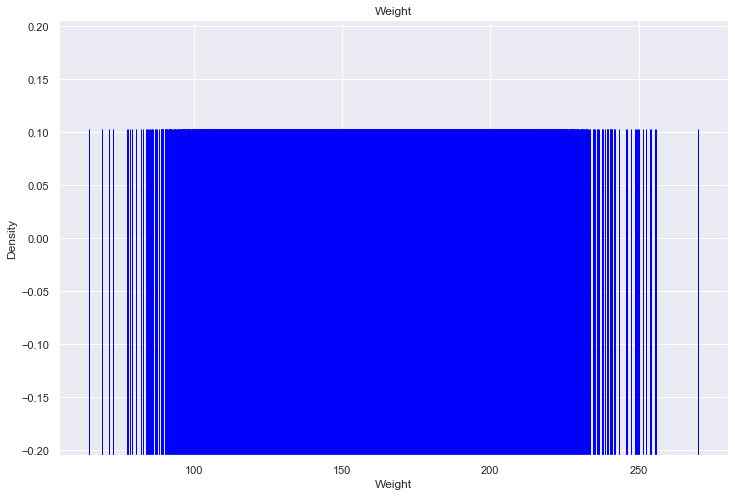

In [74]:
plt.figure(figsize=(12, 8))

sns.rugplot(
    weight_data['Weight'],
    height=0.75,
    color='blue'
)

plt.title('Weight')
plt.ylabel('Density')


Text(0, 0.5, 'Density')

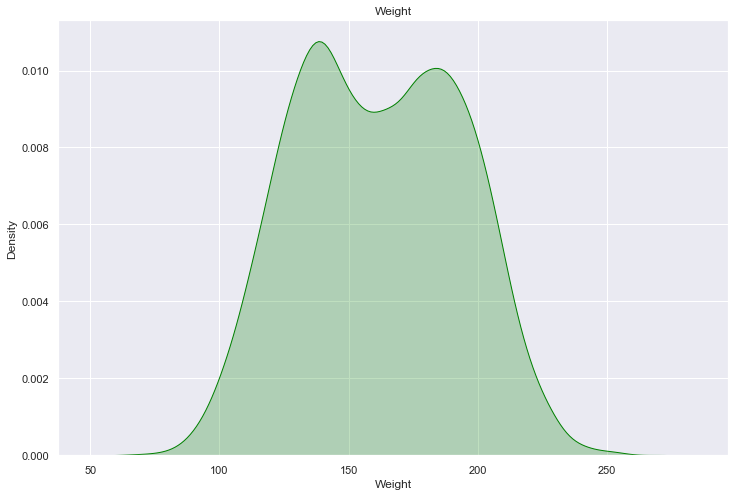

In [75]:
plt.figure(figsize=(12, 8))

# sns.set_color_codes(palette='deep')
sns.set(color_codes=True)

sns.kdeplot(weight_data['Weight'], shade=True, color='green')

plt.title('Weight')
plt.ylabel('Density')


In [76]:
# https://acrhive.ics.uci.edu/ml/datasets/auto+mpg
mpg_data = pd.read_json('datasets/auto-mpg.json')
mpg_data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [77]:
from numpy import nan

In [78]:
mpg_data.replace('.', nan, inplace=True)
mpg_data.replace('?', nan, inplace=True)

mpg_data = mpg_data.dropna()
mpg_data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [79]:
mpg_data.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [80]:
# rearranging columns in the DataFrame
mpg_data = mpg_data[
    [
        'acceleration', 'car name', 'cylinders', 'displacement', 'horsepower', 'model year',
        'mpg', 'origin', 'weight'
    ]
]
mpg_data.head()


,acceleration,car name,cylinders,displacement,horsepower,model year,mpg,origin,weight
0,12.0,chevrolet chevelle malibu,8,307.0,130.0,70,18.0,1,3504
1,11.5,buick skylark 320,8,350.0,165.0,70,15.0,1,3693
2,11.0,plymouth satellite,8,318.0,150.0,70,18.0,1,3436
3,12.0,amc rebel sst,8,304.0,150.0,70,16.0,1,3433
4,10.5,ford torino,8,302.0,140.0,70,17.0,1,3449


## Visualizing bivariate relationships


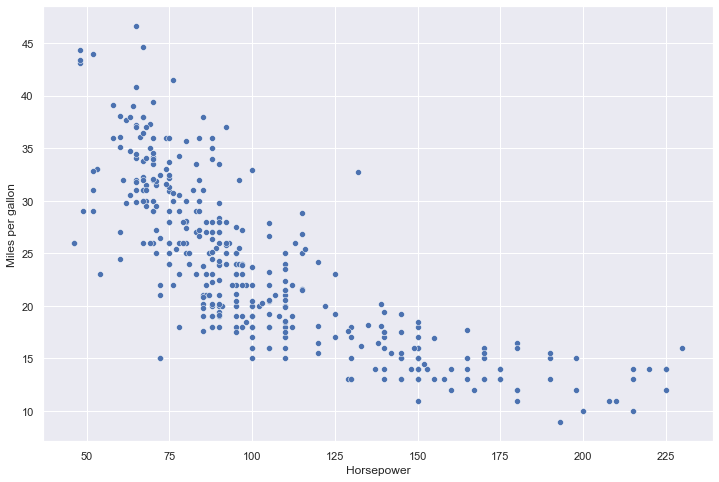

In [81]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='horsepower', y='mpg',
    data=mpg_data
)

plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.show()

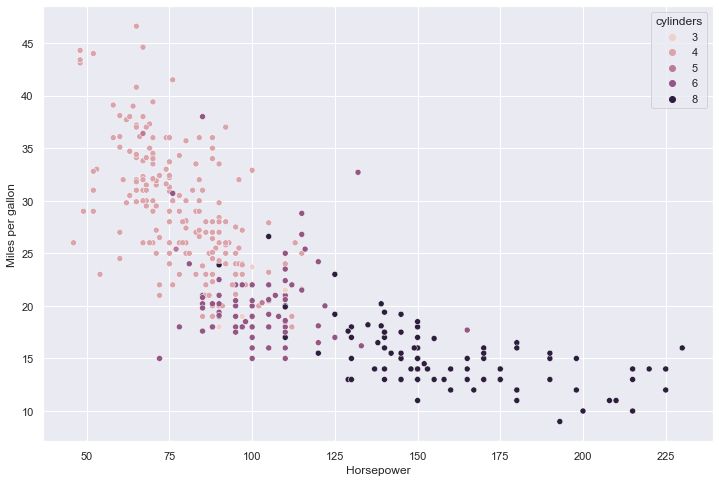

In [82]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='horsepower', y='mpg',
    data=mpg_data,
    hue='cylinders'
)

plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.show()

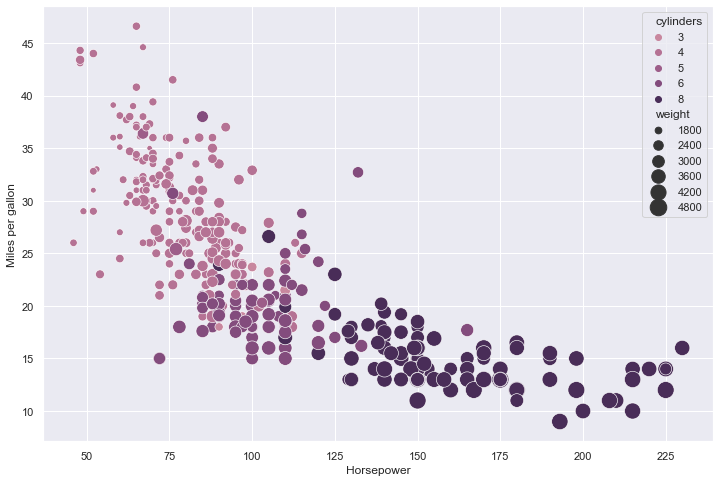

In [83]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='horsepower', y='mpg',
    hue='cylinders',
    data=mpg_data,
    size='weight',
    sizes=(30, 300),
    hue_norm=(0, 9)
)

plt.xlabel('Horsepower')
plt.ylabel('Miles per gallon')
plt.show()

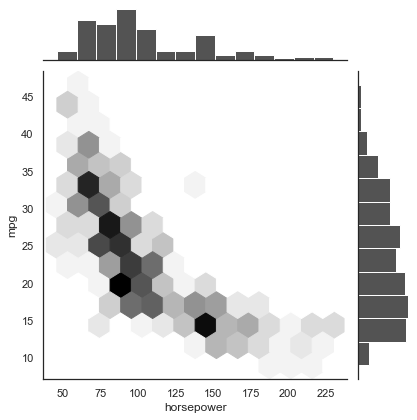

In [84]:
with sns.axes_style('white'):
    sns.jointplot(x='horsepower', y='mpg',
                  data=mpg_data, kind='hex', color='k')

<Axes: xlabel='model year', ylabel='mpg'>

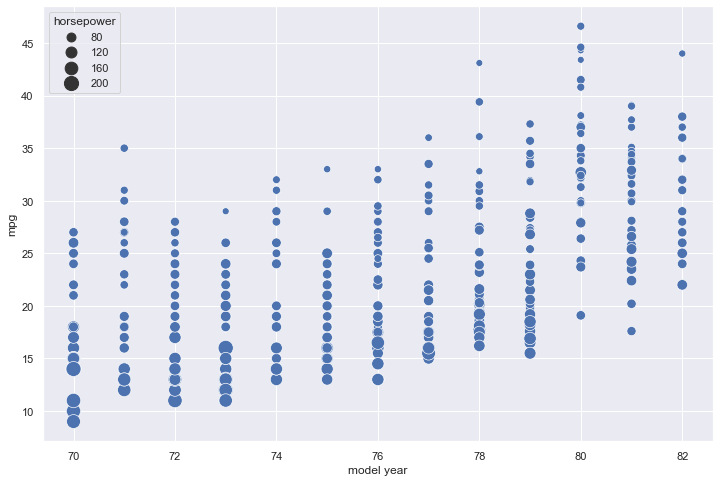

In [85]:
min_horsepower = min(mpg_data['horsepower'])
max_horsepower = max(mpg_data['horsepower'])
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x='model year', y='mpg', data=mpg_data, size='horsepower', sizes=(min_horsepower, max_horsepower))